In [1]:
%matplotlib widget

In [2]:
import numpy as np
import sunpy.map
from astropy import units as u
import matplotlib.pylab as plt

## SECCHI COR1

In [3]:
COR1_INSTR_RMIN = 1.6
COR1_INSTR_RMAX = 3.5

In [4]:
cor1a_fts_fname = '../data/cor1a1/20080201_000500_1P4c1A.fts'

In [5]:
cor1a = sunpy.map.Map(cor1a_fts_fname)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2008-02-01 00:05:00
Exposure Time,-1.0 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[7.5043001 7.5043001] arcsec / pix
Reference Pixel,[513.04 513.555] pix

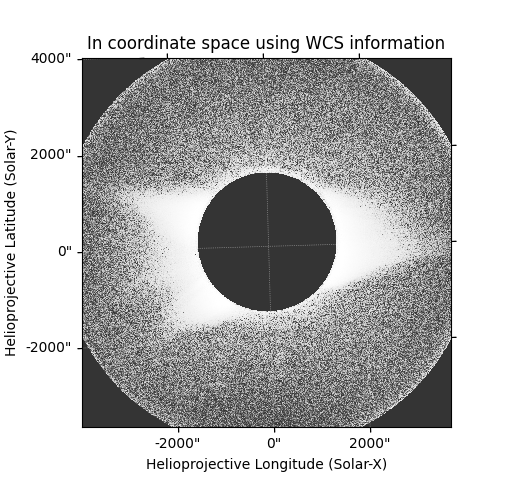
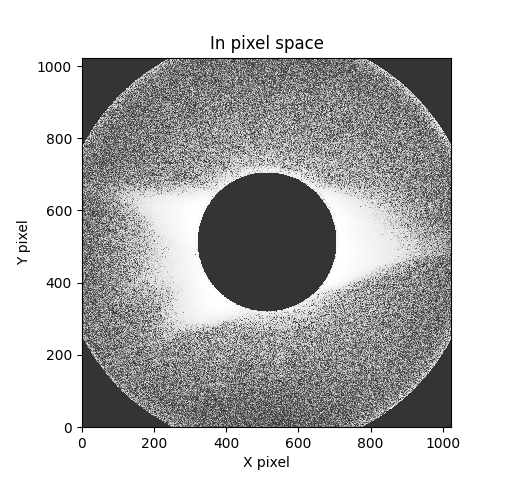
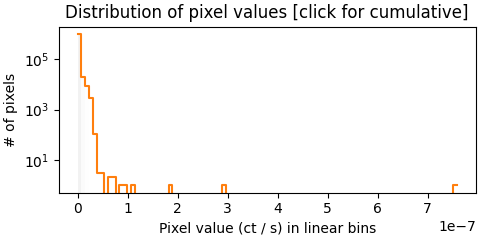
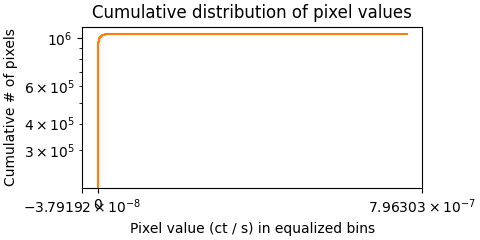

In [6]:
cor1a

In [7]:
cor1a.fits_header['RSUN']

992.58221202

In [8]:
def arcsec_to_Rsun(arcsec, RSUN):
    # RSUN is the angular semidimeter of the solar disk (in arcsec)
    #return (arcsec / constants.average_angular_size.value).value
    return (arcsec / RSUN).value

In [9]:
def get_extent(smap, units='arcsec', RSUN=None):
    ny, nx = smap.data.shape
    lower_left = smap.pixel_to_world(-0.5 * u.pix, -0.5 * u.pix)
    upper_right = smap.pixel_to_world((nx - 0.5) * u.pix, (ny - 0.5) * u.pix)
    if units == 'arcsec':
        return (lower_left.Tx.value, upper_right.Tx.value, lower_left.Ty.value, upper_right.Ty.value)
    elif units == 'Rsun':
        assert RSUN is not None
        return (arcsec_to_Rsun(lower_left.Tx, RSUN), 
                arcsec_to_Rsun(upper_right.Tx, RSUN), 
                arcsec_to_Rsun(lower_left.Ty, RSUN), 
                arcsec_to_Rsun(upper_right.Ty, RSUN))
    else:
        assert False

In [10]:
get_extent(cor1a)

(-3994.1253933180124, 3910.901716114836, -3644.130179772041, 3809.91934455444)

In [11]:
sunpy.map.all_corner_coords_from_map(cor1a)[0,0]

<SkyCoord (Helioprojective: obstime=2008-02-01T00:05:00.004, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2008-02-01T00:05:00.004, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (21.76500434, -7.18239724, 1.44631104e+11)>): (Tx, Ty) in arcsec
    (-3994.12539332, -3644.13017977)>

In [12]:
sunpy.map.all_corner_coords_from_map(cor1a)[1024,1024]

<SkyCoord (Helioprojective: obstime=2008-02-01T00:05:00.004, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2008-02-01T00:05:00.004, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (21.76500434, -7.18239724, 1.44631104e+11)>): (Tx, Ty) in arcsec
    (3910.90171611, 3809.91934455)>

In [13]:
get_extent(cor1a, units='Rsun', RSUN=cor1a.fits_header['RSUN'])

(-4.0239743821215415,
 3.9401287558395546,
 -3.671363576379116,
 3.8383917205214555)

In [14]:
cor1a.center

<SkyCoord (Helioprojective: obstime=2008-02-01T00:05:00.004, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2008-02-01T00:05:00.004, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (21.76500434, -7.18239724, 1.44631104e+11)>): (Tx, Ty) in arcsec
    (-41.65017139, 82.90072727)>

In [15]:
def plot_rmin_rmax(fts_fname, rmin, rmax, vmin=-10, vmax=-7, title=None):
    fts_map = sunpy.map.Map(fts_fname)
    sun = plt.Circle((arcsec_to_Rsun(fts_map.center.Tx, RSUN=fts_map.fits_header['RSUN']), 
                      arcsec_to_Rsun(fts_map.center.Ty, RSUN=fts_map.fits_header['RSUN'])), 1, color='y')
    rmin = plt.Circle((arcsec_to_Rsun(fts_map.center.Tx, RSUN=fts_map.fits_header['RSUN']), 
                       arcsec_to_Rsun(fts_map.center.Ty, RSUN=fts_map.fits_header['RSUN'])), rmin, color='r', fill=False)
    rmax = plt.Circle((arcsec_to_Rsun(fts_map.center.Tx, RSUN=fts_map.fits_header['RSUN']), 
                       arcsec_to_Rsun(fts_map.center.Ty, RSUN=fts_map.fits_header['RSUN'])), rmax, color='r', fill=False)
    
    fig, ax = plt.subplots()
    im = ax.imshow(np.log10(fts_map.data), vmin=vmin, vmax=vmax, interpolation='none', 
                   extent=get_extent(fts_map, units='Rsun', RSUN=fts_map.fits_header['RSUN']), origin='lower')
    fig.colorbar(im, ax=ax)
    ax.add_patch(sun)
    ax.add_patch(rmin)
    ax.add_patch(rmax)
    ax.set_xlabel('Solar X [Rsun]')
    ax.set_ylabel('Solar Y [Rsun]')
    if title:
        ax.set_title(title)
    return fig, ax

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/var/folders/l5/1f1_y2d91k5_lnp77chd3d8c0000gn/T/ipykernel_44677/708883780.py:11: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(fts_map.data), vmin=vmin, vmax=vmax, interpolation='none',


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'STEREO-A COR1 2008-02-01T00:05:00.004'}, xlabel='Solar X [Rsun]', ylabel='Solar Y [Rsun]'>)

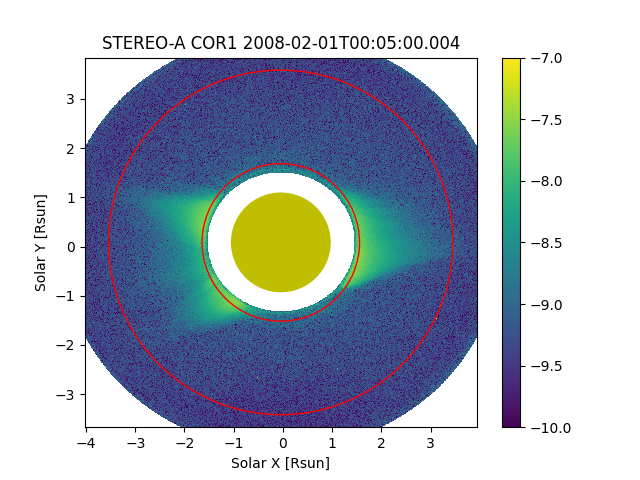

In [16]:
plot_rmin_rmax(cor1a_fts_fname, COR1_INSTR_RMIN, COR1_INSTR_RMAX, title=f'STEREO-A COR1 {cor1a.date}')

## LASCO C2

In [17]:
c2_fts_fname = '../data/lasco_c2/22272824pB.fts'
c2_rmin = 2.1
c2_rmax = 6.3

In [18]:
lasco_c2 = sunpy.map.Map(c2_fts_fname)

Observatory,SOHO
Instrument,LASCO
Detector,C2
Measurement,white-light
Wavelength,Unknown
Observation Date,2008-02-01 20:56:38
Exposure Time,Unknown
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[23.799999 23.799999] arcsec / pix
Reference Pixel,[254.286 252.599] pix

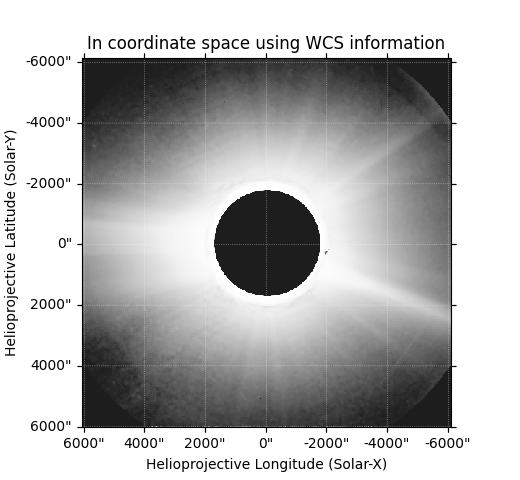
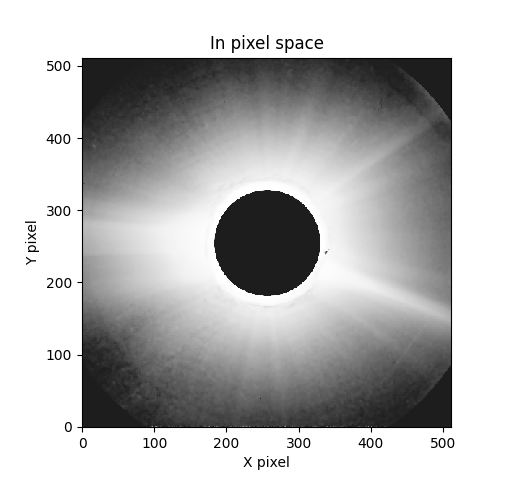
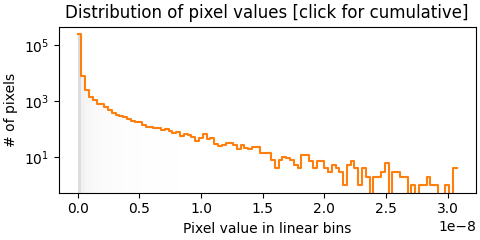
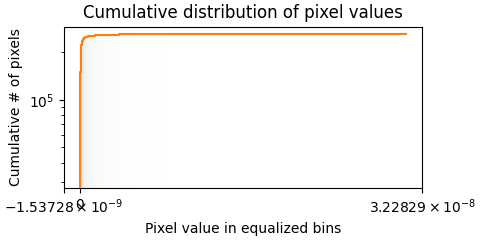

In [19]:
lasco_c2

/var/folders/l5/1f1_y2d91k5_lnp77chd3d8c0000gn/T/ipykernel_44677/708883780.py:11: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(fts_map.data), vmin=vmin, vmax=vmax, interpolation='none',


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'LASCO-C2 2008-02-01T20:56:38.096'}, xlabel='Solar X [Rsun]', ylabel='Solar Y [Rsun]'>)

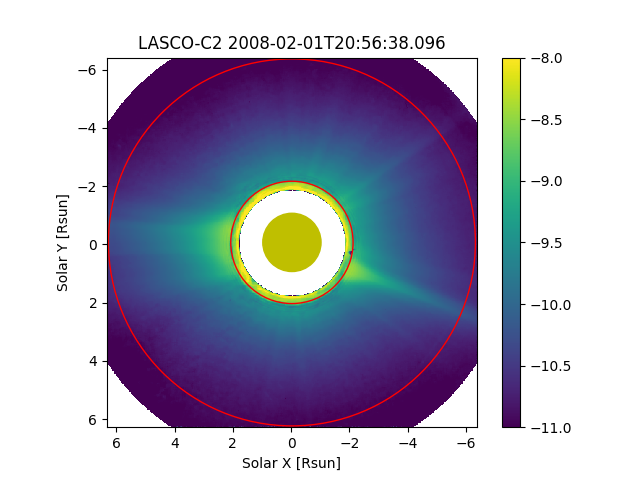

In [20]:
plot_rmin_rmax(c2_fts_fname, c2_rmin, c2_rmax, vmin=-11, vmax=-8, title=f'LASCO-C2 {lasco_c2.date}')